<a href="https://colab.research.google.com/github/girlandred/data-engineering/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [ ]:
data = pd.read_csv('data.csv')
breast_cancer = data.drop(['id'], axis = 1)

In [ ]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print('Shape of dataframe:',breast_cancer.shape)
print('Columns in dataframe:',breast_cancer.columns)

Shape of dataframe: (569, 32)
Columns in dataframe: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
breast_cancer.drop(breast_cancer.columns[breast_cancer.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


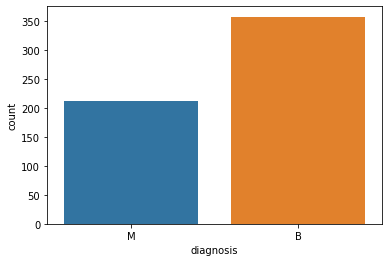

In [ ]:
sns.countplot(breast_cancer['diagnosis'])

In [ ]:
breast_cancer['diagnosis'] = [1 if i.strip() == 'M' else 0 for i in breast_cancer['diagnosis']]

In [ ]:
# Correlations
corr_matrix = breast_cancer.corr()

In [ ]:
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
y = breast_cancer.diagnosis
x = breast_cancer.drop(["diagnosis"], axis = 1)
columns = x.columns.tolist()

In [ ]:
 #Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

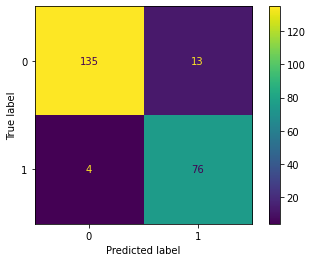

In [ ]:
#Confusion Matrix
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train_df = pd.DataFrame(x_train, columns = columns)

In [ ]:
x_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,...,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02
mean,-6.446456e-17,-2.213934e-17,-2.454863e-16,2.760907e-16,-1.604451e-15,-2.865092e-16,-1.562777e-17,3.281832e-16,3.229740e-16,-7.527377e-16,...,-2.995323e-17,-7.162729e-17,2.213934e-16,-6.869708e-17,1.041852e-16,3.125555e-17,-3.125555e-17,-3.073462e-16,-3.776712e-16,2.448351e-16
std,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,...,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00
min,-1.678106e+00,-2.193695e+00,-1.602190e+00,-1.260240e+00,-2.447869e+00,-1.647974e+00,-1.130941e+00,-1.293768e+00,-2.369485e+00,-1.690876e+00,...,-1.535514e+00,-2.206061e+00,-1.544890e+00,-1.122392e+00,-2.197884e+00,-1.437382e+00,-1.368655e+00,-1.792852e+00,-2.075926e+00,-1.611779e+00
25%,-6.957800e-01,-7.051759e-01,-6.779301e-01,-6.539245e-01,-7.571603e-01,-7.660054e-01,-7.582112e-01,-7.482452e-01,-6.958220e-01,-7.015812e-01,...,-6.739234e-01,-6.923703e-01,-6.879123e-01,-6.333785e-01,-7.428860e-01,-7.079198e-01,-7.949113e-01,-7.836140e-01,-6.514197e-01,-6.989199e-01
50%,-2.768836e-01,-9.456042e-02,-2.802598e-01,-3.339847e-01,-8.116717e-02,-1.861607e-01,-3.106107e-01,-3.729049e-01,-4.951924e-02,-1.719449e-01,...,-2.864355e-01,-2.016154e-02,-2.992270e-01,-3.482213e-01,-2.517382e-02,-2.598063e-01,-2.111460e-01,-2.213042e-01,-1.104881e-01,-1.922803e-01
75%,5.276195e-01,5.460098e-01,5.651938e-01,3.670676e-01,6.267398e-01,5.195688e-01,5.212002e-01,6.656757e-01,5.781042e-01,4.564837e-01,...,5.424156e-01,6.406538e-01,5.553381e-01,3.342918e-01,6.185923e-01,6.025631e-01,6.096329e-01,7.135493e-01,4.399614e-01,4.266939e-01
max,3.839953e+00,4.619852e+00,3.862948e+00,4.957472e+00,4.869830e+00,4.007546e+00,4.194844e+00,3.957864e+00,3.275391e+00,4.784134e+00,...,4.077466e+00,3.900785e+00,4.321576e+00,5.806134e+00,3.767827e+00,4.561231e+00,3.158157e+00,2.486976e+00,5.971424e+00,5.080630e+00


In [ ]:
#with pca we can reduce 30 dimension into 2 (unsupervised(no need target variable))
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

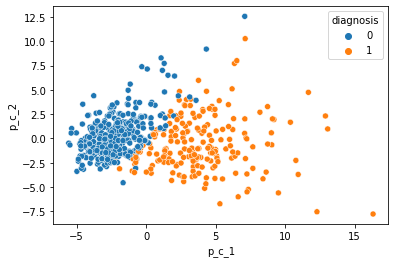

In [ ]:
pca = PCA(n_components = 2)
pca.fit(x_scaled)
x_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(x_reduced_pca, columns = ["p_c_1","p_c_2"])
pca_data["diagnosis"] =y
sns.scatterplot(x="p_c_1", y="p_c_2", hue="diagnosis", data =pca_data)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
traindf, testdf = train_test_split(breast_cancer, test_size = 0.3)

In [ ]:
#Generic function for making a classification model and accessing the performance. 
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  model.fit(data[predictors],data[outcome])

In [ ]:
#Logistic Regression model
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 89.950%


In [ ]:
#Decision Tree Model
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%


In [ ]:
#Randome Forest
predictor_var = list(breast_cancer.columns[1:11])
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 95.477%
